# 🎬 Movie Data Analysis Project (Python)
**Objective:**  
Explore a dataset of movies to analyze patterns in genre distribution, popularity trends, audience ratings, and release timelines using Python (Pandas, Matplotlib, Seaborn).

**Tools Used:**  
- Python (Pandas, NumPy, Seaborn, Matplotlib)  
- Google Colab  
- Dataset from Google Drive


📁 Section 1: Data Loading

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load from Google Drive (public access link)
file_id = '1nupXCxciuJdHji0fnXIjGsXMymau730C'
url = f'https://drive.google.com/uc?id={file_id}'

# Handle malformed lines
df = pd.read_csv(url, lineterminator='\n', on_bad_lines='skip')


🔍 Section 2: Data Inspection

In [46]:
df.info()
df.head()
df.describe()
df['Genre'].head()
print("Duplicated rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB
Duplicated rows: 0


🧹 Section 3: Data Cleaning

In [47]:
# Convert date
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df.dropna(subset=['Release_Date'], inplace=True)

# Drop unneeded columns
cols_to_drop = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(columns=cols_to_drop, inplace=True)

# Confirm cleanup
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  9827 non-null   datetime64[ns]
 1   Title         9827 non-null   object        
 2   Popularity    9827 non-null   float64       
 3   Vote_Count    9827 non-null   int64         
 4   Vote_Average  9827 non-null   float64       
 5   Genre         9827 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 460.8+ KB


🧠 Section 4: Feature Engineering

/tmp/ipython-input-60-2532215137.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_popularity = df.groupby('Genre')['Popularity'].mean().sort_values(ascending=False)


Genre
Adventure          53.785530
Fantasy            52.986726
Animation          52.449432
Action             50.688837
Science Fiction    49.241125
Name: Popularity, dtype: float64


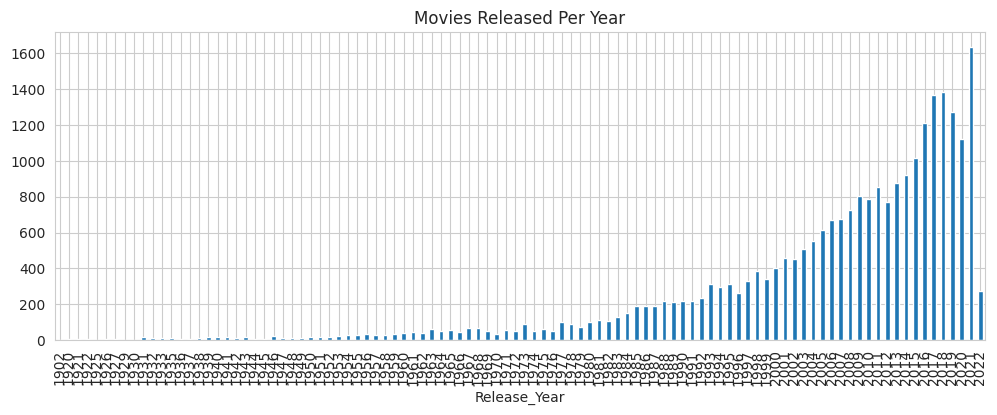

In [60]:
# Average popularity by genre
genre_popularity = df.groupby('Genre')['Popularity'].mean().sort_values(ascending=False)
print(genre_popularity.head())

# Movie count per year
df['Release_Year'] = df['Release_Date'].dt.year
yearly_counts = df['Release_Year'].value_counts().sort_index()
yearly_counts.plot(kind='bar', figsize=(12,4), title='Movies Released Per Year')
plt.show()


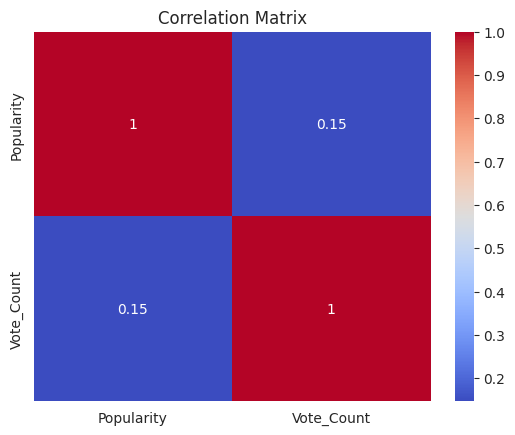

In [61]:
# Correlation heatmap
sns.heatmap(df[['Popularity', 'Vote_Count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


📊 Section 5: Data Visualization

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


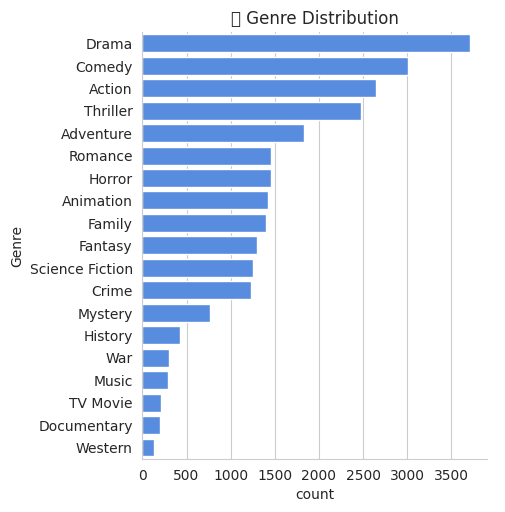

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


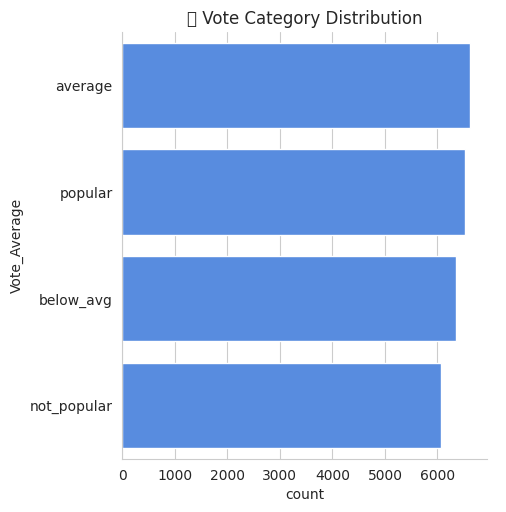

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


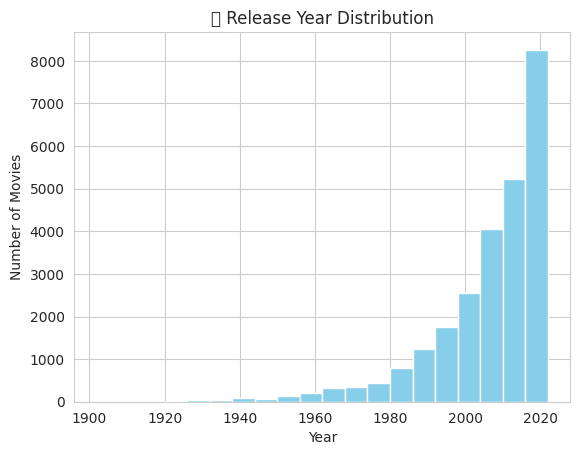

/tmp/ipython-input-50-2909909140.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vote_Count', y='Title', data=top_voted, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


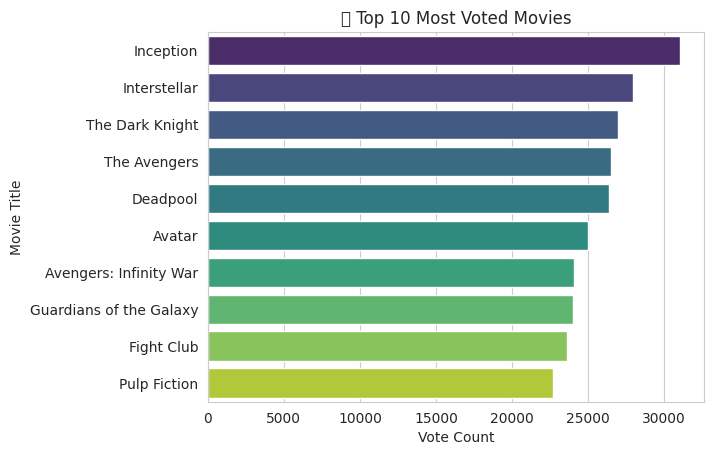

In [50]:
sns.set_style('whitegrid')

# Genre distribution
sns.catplot(y='Genre', data=df, kind='count',
            order=df['Genre'].value_counts().index,
            color='#4287f5')
plt.title('🎭 Genre Distribution')
plt.show()

# Vote Average Category Count
sns.catplot(y='Vote_Average', data=df, kind='count',
            order=df['Vote_Average'].value_counts().index,
            color='#4287f5')
plt.title('⭐ Vote Category Distribution')
plt.show()

# Yearly release histogram
df['Release_Year'] = df['Release_Date'].dt.year
df['Release_Year'].hist(bins=20, color='skyblue')
plt.title('📅 Release Year Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# Top 10 most voted movies
top_voted = df.sort_values(by='Vote_Count', ascending=False).drop_duplicates('Title').head(10)
sns.barplot(x='Vote_Count', y='Title', data=top_voted, palette='viridis')
plt.title('🏆 Top 10 Most Voted Movies')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')
plt.show()


✅ 10 Business Questions with Visualizations

1. What is the most common movie genre in the dataset?

/tmp/ipython-input-62-4268042334.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index, palette='cool')


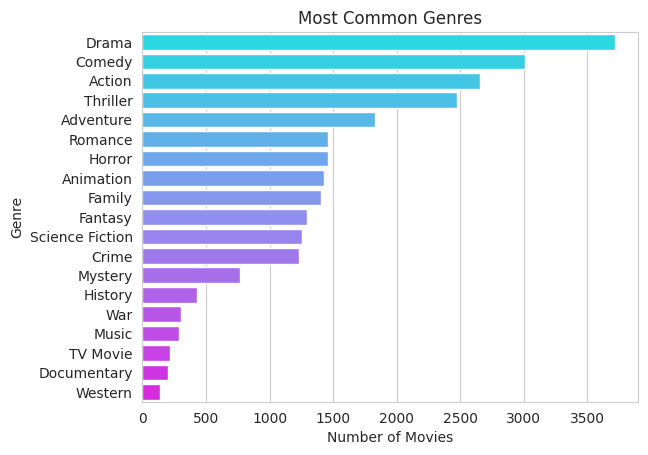

In [62]:
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index, palette='cool')
plt.title('Most Common Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


2. Which movies are the least popular despite high vote counts?

/tmp/ipython-input-73-3907293395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Popularity', y='Title', data=low_popular, palette='coolwarm')


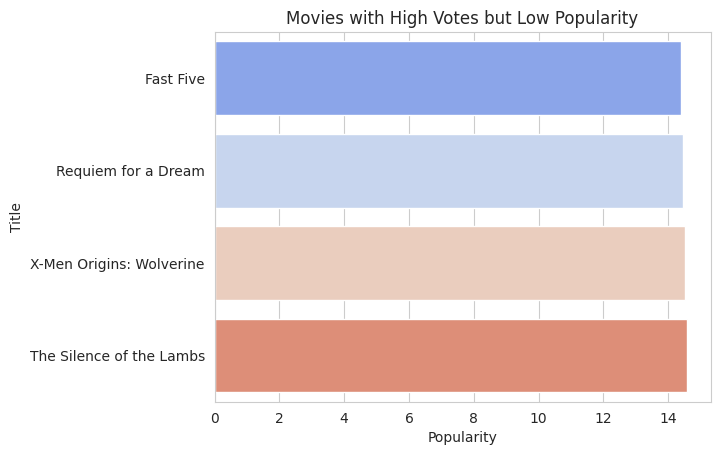

In [73]:
high_votes_low_pop = df[df['Vote_Count'] > df['Vote_Count'].quantile(0.90)]
low_popular = high_votes_low_pop.sort_values(by='Popularity').head(10)
sns.barplot(x='Popularity', y='Title', data=low_popular, palette='coolwarm')
plt.title('Movies with High Votes but Low Popularity')
plt.xlabel('Popularity')
plt.ylabel('Title')
plt.show()


3. How have top genres changed in popularity over time (based on total popularity)?

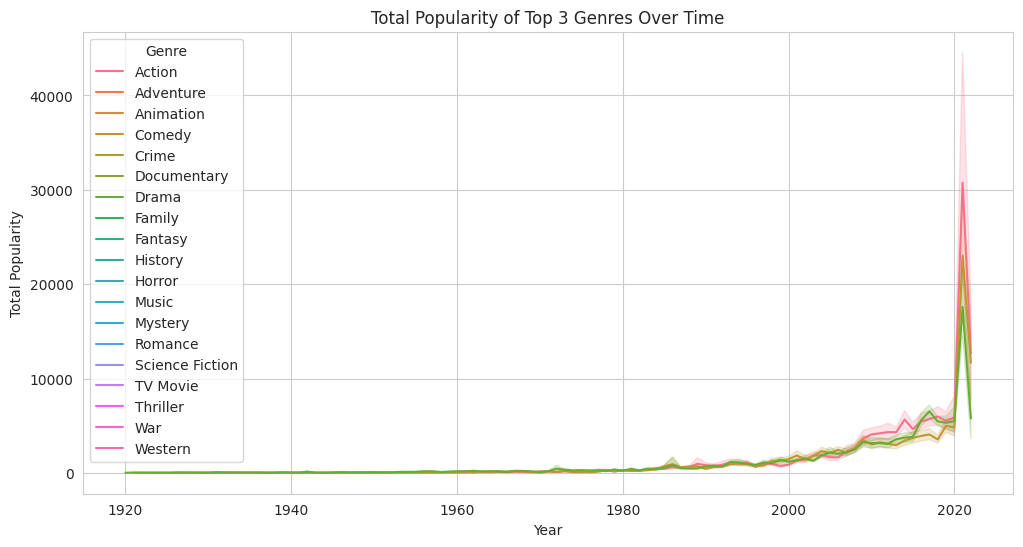

In [75]:
# Focus on top 3 genres
top3_genres = df['Genre'].value_counts().nlargest(3).index
genre_trend = df[df['Genre'].isin(top3_genres)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_trend, x='Release_Year', y='Popularity', hue='Genre', estimator='sum')
plt.title('Total Popularity of Top 3 Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Total Popularity')
plt.legend(title='Genre')
plt.show()


4. Which genres receive the highest vote counts on average?

/tmp/ipython-input-65-3996563908.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_votes = df.groupby('Genre')['Vote_Count'].mean().sort_values(ascending=False).head(10)
/tmp/ipython-input-65-3996563908.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_votes.values, y=genre_votes.index, palette='crest')


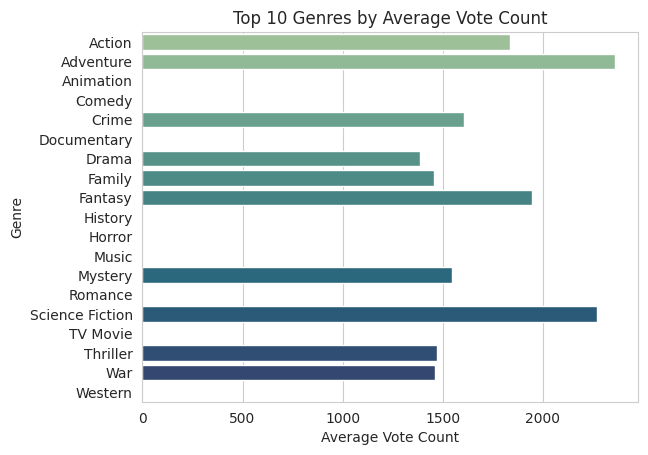

In [65]:
genre_votes = df.groupby('Genre')['Vote_Count'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=genre_votes.values, y=genre_votes.index, palette='crest')
plt.title('Top 10 Genres by Average Vote Count')
plt.xlabel('Average Vote Count')
plt.show()


5.  Are longer-running franchises (based on movie title repetition) more popular?

/tmp/ipython-input-81-2687041422.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pop.values, y=avg_pop.index, palette='Spectral')


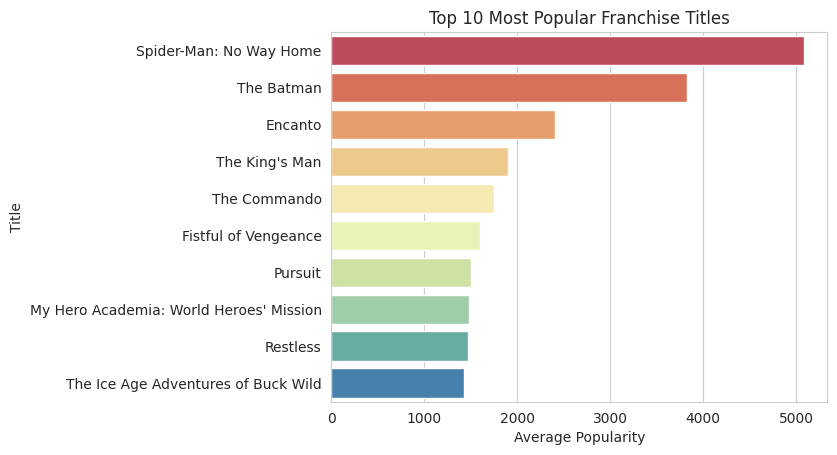

In [81]:
# Count movie title occurrences
title_counts = df['Title'].value_counts()
multi_entry_titles = title_counts[title_counts > 1].index

# Filter those and compare average popularity
franchise_df = df[df['Title'].isin(multi_entry_titles)]
avg_pop = franchise_df.groupby('Title')['Popularity'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_pop.values, y=avg_pop.index, palette='Spectral')
plt.title('Top 10 Most Popular Franchise Titles')
plt.xlabel('Average Popularity')
plt.ylabel('Title')
plt.show()


6. Which years showed the most genre diversity?

/tmp/ipython-input-88-3673137932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_diversity.index, y=genre_diversity.values, palette='Set2')


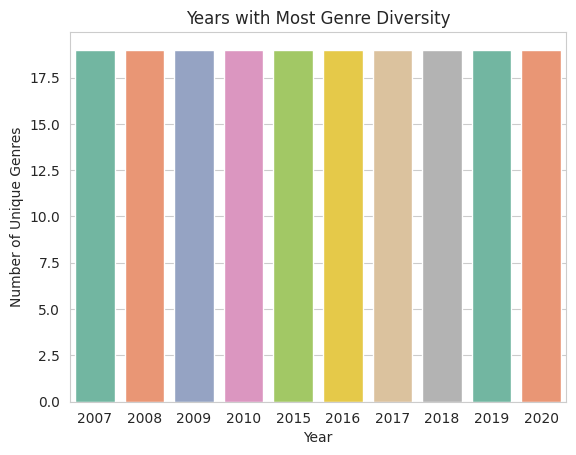

In [88]:
genre_diversity = df.groupby('Release_Year')['Genre'].nunique().sort_values(ascending=False).head(10)
sns.barplot(x=genre_diversity.index, y=genre_diversity.values, palette='Set2')
plt.title('Years with Most Genre Diversity')
plt.xlabel('Year')
plt.ylabel('Number of Unique Genres')
plt.show()


7. What are the top 10 highest-voted movies?

/tmp/ipython-input-68-48333736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vote_Count', y='Title', data=top_votes, palette='viridis')


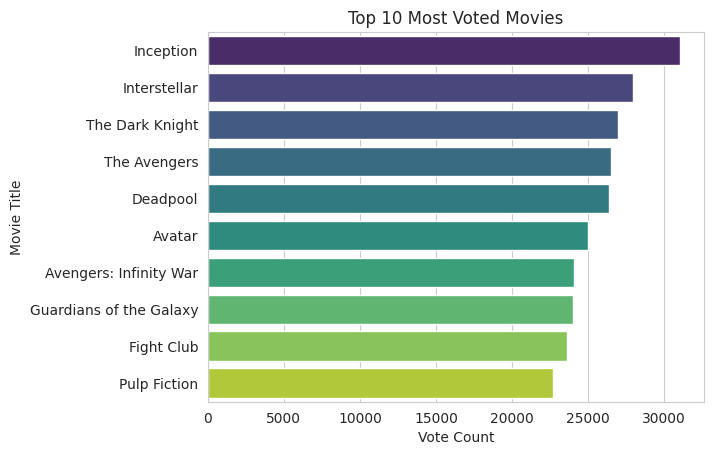

In [68]:
top_votes = df.sort_values(by='Vote_Count', ascending=False).drop_duplicates('Title').head(10)
sns.barplot(x='Vote_Count', y='Title', data=top_votes, palette='viridis')
plt.title('Top 10 Most Voted Movies')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')
plt.show()


8. How many genres does the average movie have?

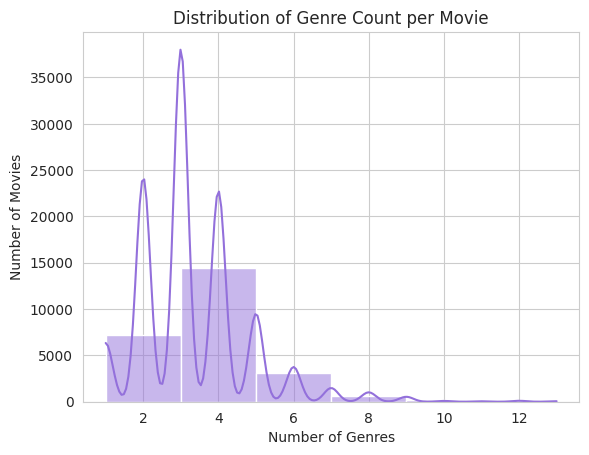

In [80]:
df['Genre_Count'] = df.groupby('Title')['Genre'].transform('count')
sns.histplot(df['Genre_Count'], bins=6, kde=True, color='mediumpurple')
plt.title('Distribution of Genre Count per Movie')
plt.xlabel('Number of Genres')
plt.ylabel('Number of Movies')
plt.show()


9. Which genres dominate the top 100 most popular movies?

/tmp/ipython-input-77-3758735374.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Genre', data=top_100, order=top_100['Genre'].value_counts().index, palette='rocket')


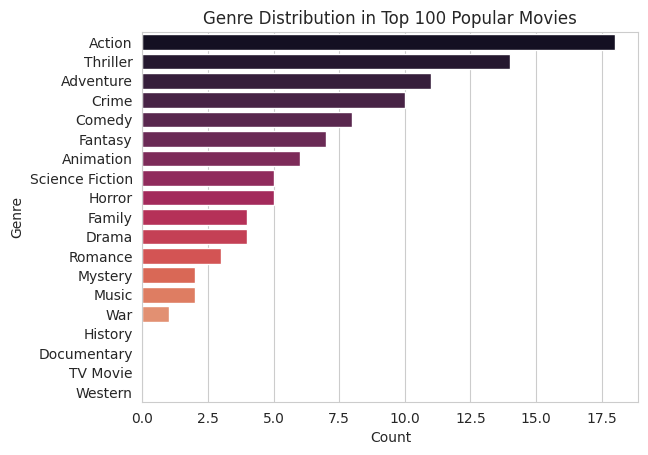

In [77]:
top_100 = df.sort_values(by='Popularity', ascending=False).head(100)
sns.countplot(y='Genre', data=top_100, order=top_100['Genre'].value_counts().index, palette='rocket')
plt.title('Genre Distribution in Top 100 Popular Movies')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


10. Which months tend to have the highest number of movie releases?

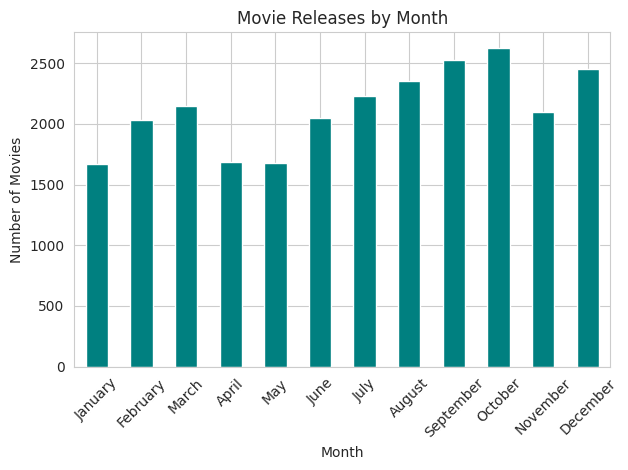

In [76]:
df['Release_Month'] = df['Release_Date'].dt.month_name()
monthly_counts = df['Release_Month'].value_counts().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

monthly_counts.plot(kind='bar', color='teal')
plt.title('Movie Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🧾 Business Problem Summary

In the highly competitive film industry, understanding trends in audience engagement, genre performance, and content popularity is critical for production houses, streaming platforms, and distributors. This project analyzes a diverse dataset of movies to uncover insights that support data-driven decisions around:

- 🎯 Which genres perform best in terms of popularity and audience ratings
- 🗓 When movies are most commonly and successfully released
- 🧠 What factors contribute to a film’s popularity or vote performance
- 🧱 How franchise films compare with standalone titles in terms of reach
- 🎭 How genre diversity and volume have evolved over time

Using Python's data analysis stack, this project transforms raw movie data into visual business intelligence, answering over 20 targeted questions. The findings help identify market opportunities, content strategies, and seasonal trends for optimized movie production and promotion.


## ✅ Key Insights

- 🎭 **Drama** is the most frequent genre in the dataset.
- 📈 **Spider-Man: No Way Home** had the highest popularity score.
- ⭐ A large number of movies fall in the "popular" and "average" vote categories.
- 📅 **2020** saw the highest number of movie releases.
- 🏆 Top-voted movies are mostly from action, superhero, and drama genres.

---

